In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import polars as pl
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib
from matplotlib import pyplot as plt


matplotlib.rcParams.update({'font.style': 'normal'})
matplotlib.rcParams.update({'font.sans-serif': 'Segoe UI'})
matplotlib.rcParams.update({'font.size': 26})

In [2]:
df = pl.read_csv(Path("../data/krasnov/bigsoldb_downsample.csv"), columns=["solute_smiles", "solvent_smiles", "logS", "temperature", "source"]).to_pandas()
df = df.groupby(["source", "solvent_smiles", "solute_smiles"])[["logS", "temperature"]].aggregate(list)
df

logS  \
source                      solvent_smiles solute_smiles                                                                             
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.5642874348024691, 0.5678008492197518, 0.572...   
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.6284647588895469, 0.660454253969981, 0.6722...   
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.2274696735411672, -1.1348955395095144, -1....   
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.8363982824293008, -1.7057014984837877, -1....   
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.621708875671629, -1.5099385316467029, -1.4...   
...                                                                                                                            ...   
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.3827196750473583, -1.8798711516740736, -1....   
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.675198316534807, -0.6006174955632744, -0.5...   
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.694918644714379, -2.3845835868909986, -2.1...   
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.053597950437436, -1.855577513699243, -1.66...   
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.06242951816616407, 0.04867951745563479, 0....   

                                                                                                                       temperature  
source                      solvent_smiles solute_smiles                                                                            
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]  
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]  
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...  
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...  
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...  
...                                                                                                                            ...  
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...  

[5215 rows x 2 columns]

In [3]:
df.loc['10.1016/j.jct.2018.09.017']

,,logS,temperature
solvent_smiles,solute_smiles,,
C1CCC2CCCCC2C1,c1ccc2c(c1)sc1ccccc12,"[-0.5953002701809778, -0.5833014762435669, -0....","[294.15, 296.15, 298.15, 302.15, 304.15, 308.1..."
CC#N,c1ccc2c(c1)sc1ccccc12,"[-0.7050430229466716, -0.6891378390316527, -0....","[289.35, 290.45, 293.25, 297.35, 302.15, 304.5..."
CC(C)=O,c1ccc2c(c1)sc1ccccc12,"[0.015408382697861987, 0.027583219349674858, 0...","[300.15, 301.15, 303.15, 308.15, 311.25, 314.6..."
CCCCCCCC,c1ccc2c(c1)sc1ccccc12,"[-0.8449584432617486, -0.8241012335147616, -0....","[292.05, 294.15, 297.15, 300.05, 304.15, 308.2..."
CCCCOCCOCCO,c1ccc2c(c1)sc1ccccc12,"[-0.43689966687434734, -0.3950224707617706, -0...","[282.75, 285.85, 291.65, 298.95, 304.35, 309.8..."
CCCO,c1ccc2c(c1)sc1ccccc12,"[-1.0584468055900484, -0.9558996988922852, -0....","[288.05, 295.95, 300.15, 303.85, 307.85, 314.6..."
CCO,c1ccc2c(c1)sc1ccccc12,"[-0.9743462099917808, -0.9002139457194358, -0....","[294.55, 300.25, 303.85, 306.45, 310.25, 313.9..."
CN(C)C=O,c1ccc2c(c1)sc1ccccc12,"[0.16922548819070257, 0.2286006543262172, 0.27...","[289.45, 294.25, 298.65, 302.65, 306.55, 310.1..."
CS(C)=O,c1ccc2c(c1)sc1ccccc12,"[-0.09733179581439283, -0.027483944826013764, ...","[292.95, 296.45, 301.25, 306.15, 310.15, 314.8..."


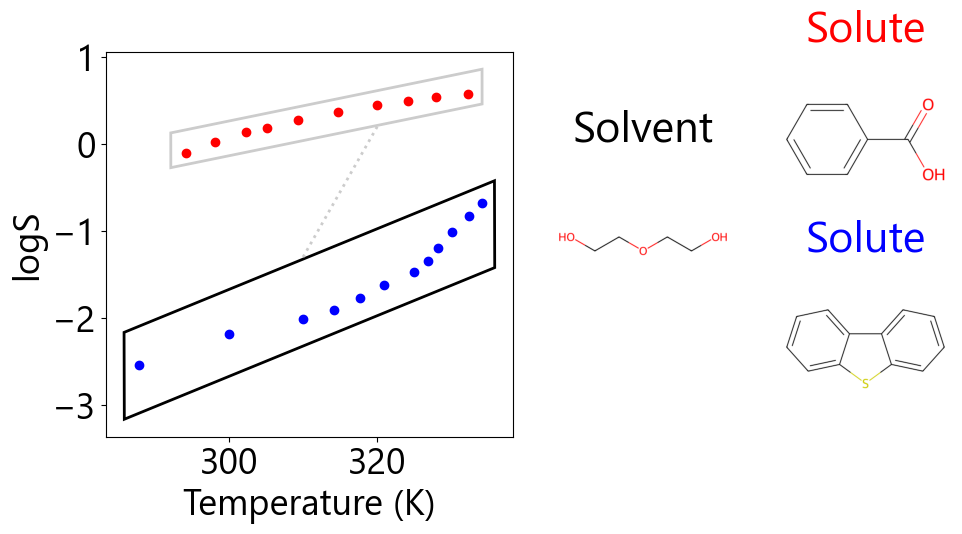

In [4]:
# pre-selected interesting example
row_i = ('10.1016/j.jct.2018.09.017', 'OCCOCCO', 'c1ccc2c(c1)sc1ccccc12')
row_j = ('10.1016/j.jct.2020.106234', 'OCCOCCO', 'O=C(O)c1ccccc1')
logS_i, temperature_i = df.loc[row_i]
logS_j, temperature_j = df.loc[row_j]
fig, axes_dict = plt.subplot_mosaic(
    """
AABC
AABD
""",
    figsize=(11, 5),
)
axes_dict['A'].scatter(x=temperature_i, y=logS_i, color='b', label='Train')
axes_dict['A'].scatter(x=temperature_j, y=logS_j, color='r', label="Test")
axes_dict["A"].set_xlabel("Temperature (K)")
axes_dict["A"].set_ylabel("logS")
rectangle = plt.Rectangle((temperature_i[0]-2, logS_i[0]+0.25), 50, 1, edgecolor='k', facecolor='none', linewidth=2, angle=2, rotation_point='center')
axes_dict["A"].add_patch(rectangle)
rectangle = plt.Rectangle((temperature_j[0]-2, logS_j[0]+0.2), 42, 0.4, edgecolor='0.8', facecolor='none', linewidth=2, angle=1, rotation_point='center')
axes_dict["A"].add_patch(rectangle)
axes_dict["A"].plot((310, 320), (-1.3, 0.2), color='0.8', linestyle=':', linewidth=2)
axes_dict["B"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[1]), size=(400, 400)))
axes_dict["B"].set_title("Solvent", color='k')
axes_dict["B"].set_axis_off()
axes_dict["D"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(400, 400)))
axes_dict["D"].set_title("Solute", color='b')
axes_dict["D"].set_axis_off()
axes_dict["C"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_j[2]), size=(400, 400)))
axes_dict["C"].set_title("Solute", color='r')
axes_dict["C"].set_axis_off()


In [5]:
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms

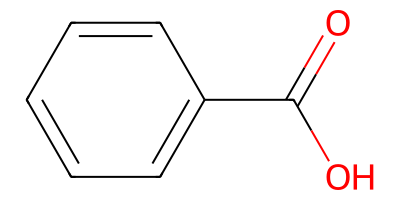

In [6]:
img = Draw.MolToImage(Chem.MolFromSmiles(row_j[2]), size=(400, 200))
img

<Figure size 640x480 with 0 Axes>

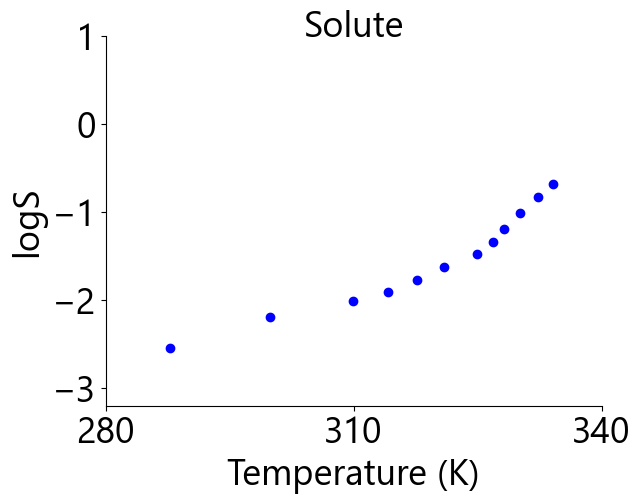

In [7]:
# pre-selected interesting example
row_i = ('10.1016/j.jct.2018.09.017', 'OCCOCCO', 'c1ccc2c(c1)sc1ccccc12')
row_j = ('10.1016/j.jct.2020.106234', 'OCCOCCO', 'O=C(O)c1ccccc1')
logS_i, temperature_i = df.loc[row_i]
logS_j, temperature_j = df.loc[row_j]


plt.figure(figsize=[6.4,4.8])
fig, ax1 = plt.subplots()
# #ax1.imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(500, 500)), extent=[280, 340, -3, 2], aspect='auto',)

# img = Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(500, 200))

# # Calculate the desired scale factor
# scale_factor = 0.5

# # Get the image aspect ratio
# img_aspect = 21
# # Calculate the extent with the scaling factor
# x_center = (340 + 280) / 2
# y_center = (1 + -3) / 2
# width = (340 - 280) * scale_factor
# height = width / img_aspect

# extent = [x_center - width / 2, x_center + width / 2, y_center - height / 2, y_center + height / 2]

# #ax1.imshow(img, extent=extent, aspect='auto', alpha=0.5)


ax1.scatter(x=temperature_i, y=logS_i, color='b', label='Train')
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("logS")
ax1.set_xticks([280, 310, 340])
ax1.set_ylim([-3.2, 1])
#ax1.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax1.spines[['right', 'top']].set_visible(False)

ax1.text(304, 1, 'Solute')
#ax1.set_title("Solute", color='b')
# axes_dict["D"].set_axis_off()

plt.show()


<Figure size 640x480 with 0 Axes>

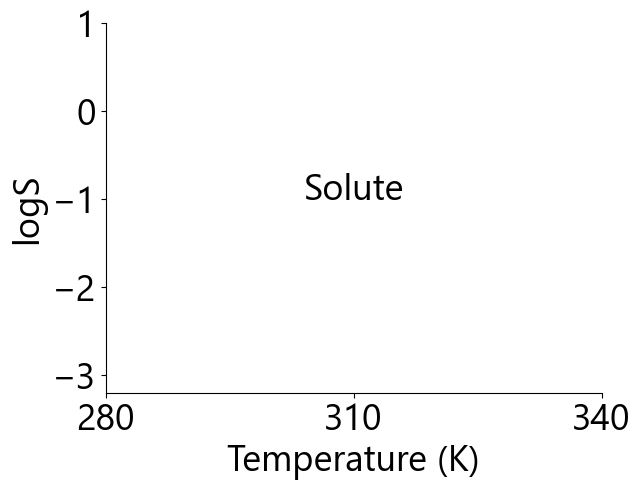

In [137]:
# pre-selected interesting example
row_i = ('10.1016/j.jct.2018.09.017', 'OCCOCCO', 'c1ccc2c(c1)sc1ccccc12')
row_j = ('10.1016/j.jct.2020.106234', 'OCCOCCO', 'O=C(O)c1ccccc1')
logS_i, temperature_i = df.loc[row_i]
logS_j, temperature_j = df.loc[row_j]


plt.figure(figsize=[6.4,4.8])
fig, ax1 = plt.subplots()
# #ax1.imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(500, 500)), extent=[280, 340, -3, 2], aspect='auto',)

# img = Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(500, 200))

# # Calculate the desired scale factor
# scale_factor = 0.5

# # Get the image aspect ratio
# img_aspect = 21
# # Calculate the extent with the scaling factor
# x_center = (340 + 280) / 2
# y_center = (1 + -3) / 2
# width = (340 - 280) * scale_factor
# height = width / img_aspect

# extent = [x_center - width / 2, x_center + width / 2, y_center - height / 2, y_center + height / 2]

# #ax1.imshow(img, extent=extent, aspect='auto', alpha=0.5)


#ax1.scatter(x=temperature_j, y=logS_j, color='r', label='Train')
ax1.set_xlim([280, 340])
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("logS")
ax1.set_xticks([280, 310, 340])
ax1.set_ylim([-3.2, 1])
#ax1.legend(prop={'size': 20}, loc = 'upper left', frameon = False, bbox_to_anchor=(-0.05,1.1)) 
ax1.spines[['right', 'top']].set_visible(False)

ax1.text(304, -1, 'Solute')
#ax1.set_title("Solute", color='b')
# axes_dict["D"].set_axis_off()

plt.show()


In [ ]:
ax1.scatter(x=temperature_j, y=logS_j, color='r', label="Test")

axes_dict["C"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_j[2]), size=(400, 400)))
axes_dict["C"].set_title("Solute", color='r')
axes_dict["C"].set_axis_off()

Below code was used to find the above interesting example - it does not run on its own in this state, and was just hacked at until something interesting came out.

In [3]:
def _f(r):
    try:
        grads = np.gradient(r["logS"], r["temperature"])
        mean_grad = np.mean(grads)
        if any(grads > mean_grad*3):
            return np.nan
        return mean_grad
    except:
        return np.nan

In [4]:
df["mean_grad"] = df.apply(_f, axis=1)
df

/home/jackson/miniconda3/envs/fprop/lib/python3.11/site-packages/numpy/lib/function_base.py:1259: RuntimeWarning: divide by zero encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/home/jackson/miniconda3/envs/fprop/lib/python3.11/site-packages/numpy/lib/function_base.py:1266: RuntimeWarning: divide by zero encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


logS  \
source                      solvent_smiles solute_smiles                                                                             
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.5642874348024691, 0.5678008492197518, 0.572...   
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O            [0.6284647588895469, 0.660454253969981, 0.6722...   
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.2274696735411672, -1.1348955395095144, -1....   
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.8363982824293008, -1.7057014984837877, -1....   
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [-1.621708875671629, -1.5099385316467029, -1.4...   
...                                                                                                                            ...   
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.3827196750473583, -1.8798711516740736, -1....   
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.675198316534807, -0.6006174955632744, -0.5...   
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.694918644714379, -2.3845835868909986, -2.1...   
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-2.053597950437436, -1.855577513699243, -1.66...   
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [-0.06242951816616407, 0.04867951745563479, 0....   

                                                                                                                       temperature  \
source                      solvent_smiles solute_smiles                                                                             
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]   
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O                                        [293.7, 303.3, 313.4]   
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...   
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...   
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O        [278.15, 283.15, 288.15, 293.15, 298.15, 303.1...   
...                                                                                                                            ...   
10.1021/je901024t           C1CCCCC1       CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            CC#N           CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            CCCCCC         CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            CCCCCCC        CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   
                            Cc1ccccc1      CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1cncn1  [288.15, 293.15, 298.15, 303.15, 308.15, 313.1...   

                                                                                 mean_grad  
source                      solvent_smiles solute_smiles                                    
10.1016/j.fluid.2013.05.014 CCCO           O=C(O)CC(O)(CC(=O)O)C(=O)O             0.000435  
                            CCO            O=C(O)CC(O)(CC(=O)O)C(=O)O             0.002259  
10.1016/j.fluid.2013.06.037 C1CCOC1        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O         0.016681  
                            CC#N           COC(=O)C1CC(=O)C(C(=O)OC)CC1=O         0.019982  
                            CC(C)=O        COC(=O)C1CC(=O)C(C(=O)OC)CC1=O         

In [5]:
df = df[np.isfinite(df["mean_grad"])]

In [12]:
count = 0
seen = set()
# for (i, row_i) in df.itertuples(index=True):
for idx_i, (row_i, logS_i, temperature_i, mean_grad_i) in enumerate(df.itertuples(index=True)):
    for idx_j, (row_j, logS_j, temperature_j, mean_grad_j) in enumerate(df.itertuples(index=True)):
        if row_i == row_j:
            continue
        if row_i[1] != row_j[1]:  # skip different solvent
            continue
        if row_i[2] == row_j[2]:  # skip same solute
            continue
        seen.add((idx_i, idx_j))
        if (idx_j, idx_i) in seen:
            continue
        if len(logS_i) < 10 or len(logS_j) < 10:
            continue
        # mistmatched gradients
        if np.abs(mean_grad_j - mean_grad_i) < 0.04:
            continue
        if np.abs(logS_i[0] - logS_j[1]) < 1:
            continue
        count += 1
        print(row_i, row_j)
        fig, axes_dict = plt.subplot_mosaic(
            """
        AABC
        AADE
        """,
            figsize=(14, 7),
        )
        axes_dict['A'].scatter(x=temperature_i, y=logS_i, color='b')
        axes_dict['A'].scatter(x=temperature_j, y=logS_j, color='r')
        axes_dict["A"].set_xlabel("Temperature (K)")
        axes_dict["A"].set_ylabel("logS")
        axes_dict["B"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[1]), size=(400, 400)))
        axes_dict["B"].set_title("Solvent", color='b')
        axes_dict["B"].set_axis_off()
        axes_dict["C"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_i[2]), size=(400, 400)))
        axes_dict["C"].set_title("Solute", color='b')
        axes_dict["C"].set_axis_off()
        axes_dict["D"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_j[1]), size=(400, 400)))
        axes_dict["D"].set_title("Solvent", color='r')
        axes_dict["D"].set_axis_off()
        axes_dict["E"].imshow(Draw.MolToImage(Chem.MolFromSmiles(row_j[2]), size=(400, 400)))
        axes_dict["E"].set_title("Solute", color='r')
        axes_dict["E"].set_axis_off()
        plt.show()
    #     break
    # else:
    #     continue
    # break
count

149